# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import random


Bad key "text.kerning_factor" on line 4 in
C:\Users\joaop\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
list_x=[]

def roll_dice():
    sequence=[1,2,3,4,5,6]
    random.choice(sequence)
    list_x=[random.choice(sequence) for x in range(1,11)] #creating list to randomly select
    df=pd.DataFrame(list_x)
    return df
df=roll_dice()

In [3]:
df #printing df 

,0
0,5
1,2
2,1
3,5
4,1
5,2
6,5
7,2
8,6
9,6


#### 2.- Plot the results sorted by value.

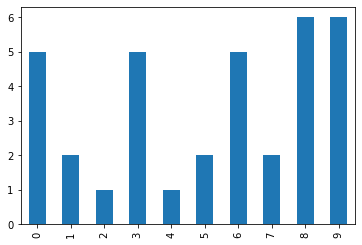

In [4]:
# your code here
df.sort_values(by=0)
df[0].plot.bar()
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

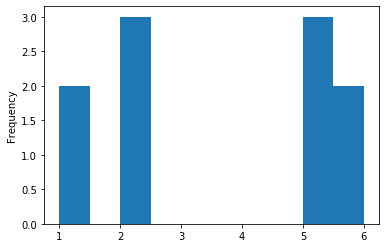

In [5]:
# your code here
df[0].plot.hist()

In [6]:
"""
We can see that the plot above shows the number of occurrences.
The first plot shows in each dice throw what is the value of the dice. It doesn't retrieve the absolute frequency of analyzed data.
"""

"\nWe can see that the plot above shows the number of occurrences.\nThe first plot shows in each dice throw what is the value of the dice. It doesn't retrieve the absolute frequency of analyzed data.\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

def mean_(x): #defining func
    '''
    below we have the sum of the values of the dice throws and below (divisor) the count of dice throws (10) 
    '''
    return x.sum()/x.count()

mean_(df)

0    3.5
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

'''
my approach:
create dict in which...
_keys=set of values of the dice throws (can be from 1 to 6, as we know)
_values=freq of the keys
'''

freq_distrib=dict()  #instantiate dict.

for x in set(df[0]):
    freq_distrib[x]=list(df[0]).count(x)/df.count() #create freq ratio for each key here.
    
#mean will be equal to keys*values
sum( [ freq_distrib[x]*x for x in freq_distrib ] ) #multiplying all then summing afterwards the elements of the list.

0    3.5
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
import math

def median_(x):
    '''
    median is computed differently depending on the cardinality of the dataframe.
    we can use a logical gateway to differ these calculus.
    '''
    index=int(len(x)/2)
    print(index)
    
    x=sorted(list(x))
    print(x)
    
    if len(x)%2==0: #if cardinality is even, then it's calculated as it can be seen below.
        first_middle_number=x[index]
        second_middle_number=x[index-1]
        final_median=(first_middle_number+second_middle_number)/2
        return final_median
    
    elif len(x)%2!=0: #if cardinality is odd, then it's calculated as it can be seen below.
        index=round(int(len(x)/2))
        final_median=x[int(len(x)/2)]
        return final_median
    else:
        pass    
    
median_(df[0])

5
[1, 1, 2, 2, 2, 5, 5, 5, 6, 6]


3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here
def four_quartiles_of_the_apocalypse(x):
    '''
    first things first: we have to sort the inputted column of the df
    '''
    x=sorted(list(x))
    
    index=len(x)-1
    
    #q1 can be computed like below. 
    index_q1=int(index*0.25)
    q1=x[index_q1]
    
    #q2 can be computed like below. 
    q2=median_(x)
    
    #q3 can be computed like below. 
    index_q3=int(index*0.75)
    q3=x[index_q3]
    
    #bonus:
    interquartile_range=q3-q1
    
    return f'''Quartiles are, respectively: Q1={q1}, Q2={q2}, and Q3={q3}.
    Additionally, the interquartile range is {interquartile_range}.'''

four_quartiles_of_the_apocalypse(df[0])

5
[1, 1, 2, 2, 2, 5, 5, 5, 6, 6]


'Quartiles are, respectively: Q1=2, Q2=3.5, and Q3=5.\n    Additionally, the interquartile range is 3.'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here
df=pd.read_csv("roll_the_dice_hundred.csv")
df.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


In [12]:
"""
I see the dice was thrown 100x.
The mean of these 100x throws is 3.74000.
The std is 1.703354.
As expected, 25% of the values of the dice throws are between 1 and 2.
As more or less expected, 50% of the values of the dice throws are between 1 and 4 (ideally it'll be between 1 and 3 as we'll see afterwards).
As expected, 75% of the values of the dice throws are between 1 and 5.
"""

"\nI see the dice was thrown 100x.\nThe mean of these 100x throws is 3.74000.\nThe std is 1.703354.\nAs expected, 25% of the values of the dice throws are between 1 and 2.\nAs more or less expected, 50% of the values of the dice throws are between 1 and 4 (ideally it'll be between 1 and 3 as we'll see afterwards).\nAs expected, 75% of the values of the dice throws are between 1 and 5.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
# your code here
mean_(df)

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [14]:
# your code here

#we can go through the complicated way...
freq_distrib=dict()  #instantiate dict.

for x in set(df['value']):
    freq_distrib[x]=list(df['value']).count(x)/df.count() #create freq ratio for each key here.

print(freq_distrib)    
#mean will be equal to keys*values
sum( [ freq_distrib[x]*x for x in freq_distrib ] ) #multiplying all then summing afterwards the elements of the list.


#or a built in way...
pd.value_counts(df['value']).sort_index()

{1: Unnamed: 0    0.12
roll          0.12
value         0.12
dtype: float64, 2: Unnamed: 0    0.17
roll          0.17
value         0.17
dtype: float64, 3: Unnamed: 0    0.14
roll          0.14
value         0.14
dtype: float64, 4: Unnamed: 0    0.22
roll          0.22
value         0.22
dtype: float64, 5: Unnamed: 0    0.12
roll          0.12
value         0.12
dtype: float64, 6: Unnamed: 0    0.23
roll          0.23
value         0.23
dtype: float64}


1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

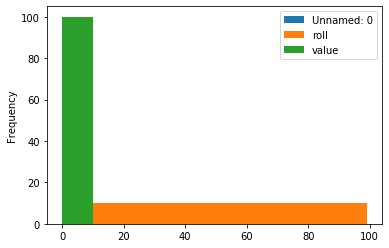

In [15]:
# your code here
#if what is required is a histogram for the whole df then:
df.plot.hist()

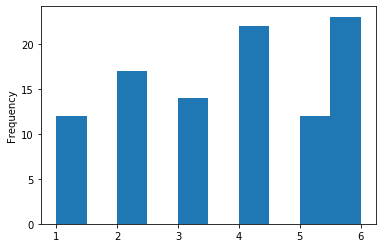

In [16]:
#if what is required is a histogram for the values of the dice throws then:
df['value'].plot.hist()

In [17]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# your code here
df=pd.read_csv("roll_the_dice_thousand.csv")
df.describe()

,Unnamed: 0,roll,value
count,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,3.447000
std,288.819436,288.819436,1.711175
min,0.000000,0.000000,1.000000
25%,249.750000,249.750000,2.000000
50%,499.500000,499.500000,3.000000
75%,749.250000,749.250000,5.000000
max,999.000000,999.000000,6.000000


In [19]:
"""
I see the dice was thrown 100x.
The mean of these 100x throws is 3.74000.
The std is 1.703354.
As expected, 25% of the values of the dice throws are between 1 and 2.
As expected, 50% of the values of the dice throws are between 1 and 3.
As expected, 75% of the values of the dice throws are between 1 and 5.
"""

'\nI see the dice was thrown 100x.\nThe mean of these 100x throws is 3.74000.\nThe std is 1.703354.\nAs expected, 25% of the values of the dice throws are between 1 and 2.\nAs expected, 50% of the values of the dice throws are between 1 and 3.\nAs expected, 75% of the values of the dice throws are between 1 and 5.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64


'\nMean shall be circa 35.\nStd shall be circa 10.\n'

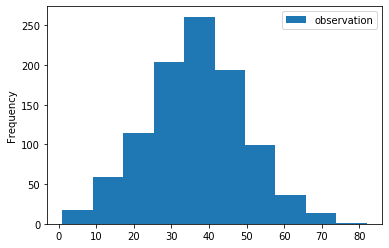

In [20]:
# your code here
df=pd.read_csv("ages_population.csv")

#we can compute the freq distrib this way:
freq_calc=pd.value_counts(df['observation']).sort_index()
print(freq_calc)

#plot hist:
df.plot.hist()

'''
Mean shall be circa 35.
Std shall be circa 10.
'''

In [21]:
df.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [22]:
# your code here
print(df.mean())
print(df.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [23]:
"""
Answer: yes, they fall.
"""

'\nAnswer: yes, they fall.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64


'\nMean shall be circa 27.\nStd shall be circa 5.\n'

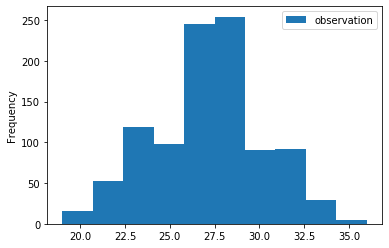

In [24]:
# your code here
df=pd.read_csv("ages_population2.csv")

#we can compute the freq distrib this way:
freq_calc=pd.value_counts(df['observation']).sort_index()
print(freq_calc)

#plot hist:
df.plot.hist()
'''
Mean shall be circa 27.
Std shall be circa 5.
'''

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [25]:
"""
Answer: yes, there are clear differences as we can see the way ages are distributed. 
First we can see the range is way lower: between 20(min) and 35(max).
Second, the data doesn't seem like a gaussian curve... it's skewed, kind of like having 3 peaks (1 major peak circa 27, 2 minor peaks)
Regarding its kurtosis: due to this more flattened distrib. we can see the kurtosis is clearly differente from the previos hist.

"""

"\nAnswer: yes, there are clear differences as we can see the way ages are distributed. \nFirst we can see the range is way lower: between 20(min) and 35(max).\nSecond, the data doesn't seem like a gaussian curve... it's skewed, kind of like having 3 peaks (1 major peak circa 27, 2 minor peaks)\nRegarding its kurtosis: due to this more flattened distrib. we can see the kurtosis is clearly differente from the previos hist.\n\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [26]:
# your code here
print(df.mean())
print(df.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [27]:
"""
Answer: due to the more condensed/Flattened data we see that std will likely be inferior due to the previous analyzed data.
We can also see that the mean that'd likely be circa 26 or 25  is actually 27.
"""

"\nAnswer: due to the more condensed/Flattened data we see that std will likely be inferior due to the previous analyzed data.\nWe can also see that the mean that'd likely be circa 26 or 25  is actually 27.\n"

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

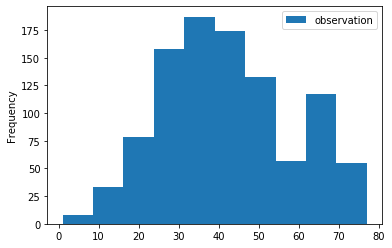

In [28]:
# your code here
df=pd.read_csv("ages_population3.csv")
df.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [29]:
# your code here
print(df.mean())
print(df.std())
print(df.median())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64
observation    40.0
dtype: float64


In [30]:
"""
We can see it is negatively skewed and that the mean is now 42.
The std also increased significantly.
"""

'\nWe can see it is negatively skewed and that the mean is now 42.\nThe std also increased significantly.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [31]:
# your code here
print(df.quantile([0.25,0.5,0.75,1.0]))
diff=float(df.mean())-float(df.median())

      observation
0.25         30.0
0.50         40.0
0.75         53.0
1.00         77.0


In [32]:
print(f"My answer is: We can see the difference between them is {diff}. It isn't much...")

My answer is: We can see the difference between them is 1.9889999999999972. It isn't much...


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [33]:
# your code here

In [34]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [35]:
# your code here

In [36]:
"""
your comments here
"""

'\nyour comments here\n'